In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [66]:
!pip install gdown


In [67]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
# contiene la etiqueta que indica si el alumno ingreso o no a la universidad.
data = pd.read_csv('/content/drive/MyDrive/dataset_logistico.csv')

X, y = data.iloc[:, 0:2], data.iloc[:, 2]
print(X)
print(y)

      feature_0  feature_1
0      0.496714  -0.138264
1      1.579213   0.767435
2      0.241962  -1.913280
3     -0.908024  -1.412304
4     -0.544383   0.110923
...         ...        ...
1495  -0.391025   1.479482
1496   0.307039  -0.051236
1497  -0.098721   0.826422
1498   1.524517  -0.444946
1499  -0.019318   0.101630

[1500 rows x 2 columns]
0       0.647689
1      -0.469474
2      -1.724918
3       1.465649
4      -1.150994
          ...   
1495   -0.659024
1496    0.625585
1497   -0.225351
1498    1.601074
1499    1.167218
Name: feature_2, Length: 1500, dtype: float64


In [68]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


1500
1500


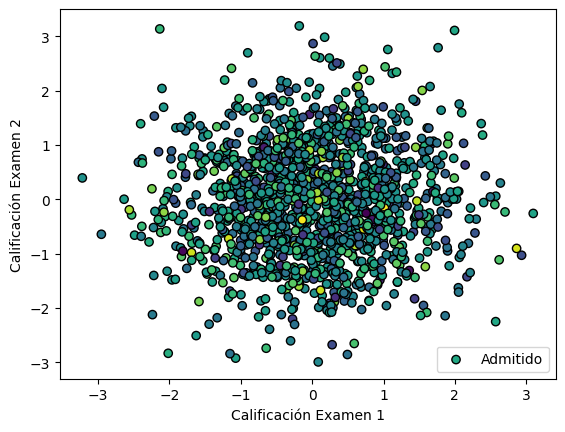

In [69]:
import matplotlib.pyplot as plt

# Verificamos que X y y tengan el mismo tamaño
print(len(X))
print(len(y))

# Crear el gráfico de dispersión
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolors='k')

# Añadir etiquetas y leyenda
plt.xlabel('Calificación Examen 1')
plt.ylabel('Calificación Examen 2')
plt.legend(['Admitido', 'No admitido'])

plt.show()


In [70]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [71]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [72]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [73]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [74]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.04694278 -0.00695734 -0.00130865]
Un estudiante con nota del examen 1: 80 y nota del examen 2: 46 (usando el descenso por el gradiente):0
El estudiante no aprueba la materia.


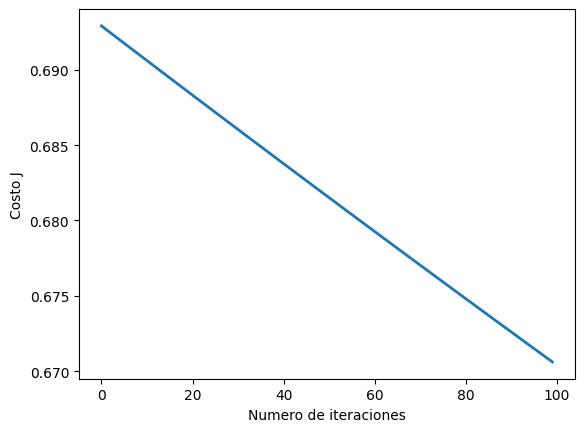

In [75]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Función Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# verificar si ingresa o no a la universidad
X_array = [1, 80, 46]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('Un estudiante con nota del examen 1: 80 y nota del examen 2: 46 (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

# Evaluar si aprueba o no
if aprueba >= 0.5:
    print('El estudiante aprueba la materia.')
else:
    print('El estudiante no aprueba la materia.')


In [76]:
X_array = [1, 80, 50]
y_predicted = sigmoid(np.dot(X_array, theta))
print('Un estudiante con nota examen 1: 80 y nota examen 2: 50 -> :{:.0f}'.format(y_predicted))

Un estudiante con nota examen 1: 80 y nota examen 2: 50 -> :0


In [77]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [78]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



[0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[0.47526975 0.07047295 0.01322134]
Gradiente en theta inicial (zeros):
	[0.4753, 0.0705, 0.0132]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [79]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24, 0.2, 0.2])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[-24.    0.2   0.2]
Costo en theta prueba: 0.610
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[-0.025, 0.065, 0.016]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


In [80]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: -0.055
Costo esperado (aproximado): 0.203

theta:
	[-13.332, -6.670, -1.362]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


<ipython-input-80-0dfcfa2e2ef1>:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,
<ipython-input-77-e3041c0335d8>:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


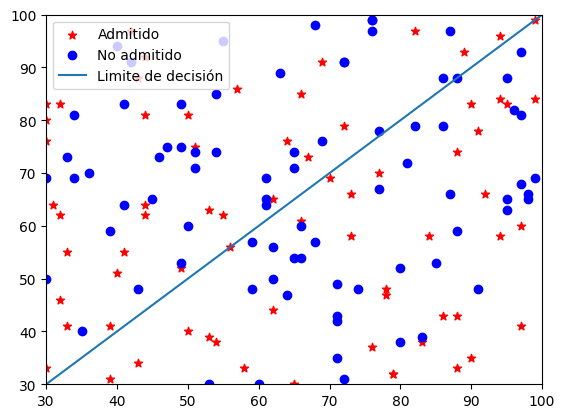

In [81]:
import numpy as np
from matplotlib import pyplot

# Definir la función plotData
def plotData(X, y):
    pos = y == 1
    neg = y == 0
    pyplot.scatter(X[pos, 1], X[pos, 2], marker='*', color='r', label='Admitido')
    pyplot.scatter(X[neg, 1], X[neg, 2], marker='o', color='b', label='No admitido')

# Definir la función sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Definir la función plotDecisionBoundary
def plotDecisionBoundary(plotData, theta, X, y):
    theta = np.array(theta)
    plotData(X, y)

    if X.shape[1] <= 3:
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
        pyplot.plot(plot_x, plot_y)
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((u.size, v.size))
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)
        z = z.T
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

# Definir la función mapFeature (si es necesario para tu caso)
def mapFeature(x1, x2):
    return np.array([1, x1, x2])

# Generar datos de entrada X y etiquetas y
np.random.seed(0)  # Para reproducibilidad
m = 150  # Número de ejemplos
X = np.ones((m, 3))  # Agregar columna de 1s para el término de sesgo
X[:, 1] = np.random.randint(30, 100, m)  # Notas examen 1
X[:, 2] = np.random.randint(30, 100, m)  # Notas examen 2

# Generar etiquetas (0 o 1) de manera aleatoria
y = (np.random.rand(m) > 0.5).astype(int)

# Valores arbitrarios para theta (para ilustrar)
theta = np.array([0, 1, -1])

# Graficar límites
plotDecisionBoundary(plotData, theta, X, y)

# Mostrar la gráfica
pyplot.show()


In [82]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [62]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 47, 77], theta))
print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: 0.000%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 50.67 %
Precisión esperada (aproximadamente): 89.00 %
